In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import sympy as sy
import math

**Problem 1**

In [2]:
def pb1(A):
    
    svds = la.svdvals(A)
    k = np.argsort(svds)
    if svds[k[0]] == 0:
        return np.inf
    else:
        return svds[k[-1]]/svds[k[0]]

In [3]:
# Test

A = np.array([[1,0,0], [0,1,0], [0,0,0]])
condA = pb1(A)
print(condA)

A = np.random.random((5,5))
Q, R = la.qr(A)
condQ = pb1(Q)
print(condQ)

A = np.random.random((5,5))
condQ1 = pb1(A)
condQ2 = np.linalg.cond(A)
print(condQ1, condQ2)

inf
1.0000000000000002
11.311194922648898 11.311194922648898


**Problem 2**

In [4]:
def wilkinson():
    
    fig, ax = plt.subplots(1, 1, figsize=(8,5))
    w_roots = np.arange(1, 21)
    w_roots = np.sort(w_roots)
      
    plt.scatter(w_roots, np.zeros(20), label='Original') 
    
    x, i = sy.symbols('x i')
    w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
    w_coeffs = np.array(w.all_coeffs())
        
    abs_cond = np.zeros(100)
    rel_cond = np.zeros(100)

    for i in range(100):
        μ, σ = 1, 1e-10 
        ri = np.random.normal(μ, σ, 21)
        w_new = np.copy(w_coeffs) * ri
        roots = np.roots(np.poly1d(w_new))
        roots = np.sort(roots)
        if i == 99:
            plt.scatter(roots.real, roots.imag, marker=',', color='black', 
                        s=1, label='Perturbed')
        else:
            plt.scatter(roots.real, roots.imag, marker=',', color='black', 
                        s=1)
    
        abs_cond[i] = la.norm(roots - w_roots, np.inf) / la.norm(w_new - w_coeffs, np.inf)
        rel_cond[i] = abs_cond[i] * la.norm(w_coeffs, np.inf) / la.norm(w_roots, np.inf)
            
    plt.legend()
    plt.xlabel('Real Axis')
    plt.ylabel('Imaginary Axis')
    plt.show()
    
    abs_condition = np.mean(abs_cond)
    rel_condition = np.mean(rel_cond)
    
    print("Approximate absolute condition number: " + str(abs_condition))
    print("Approximate relative condition number: " + str(rel_condition))

    return abs_condition, rel_condition

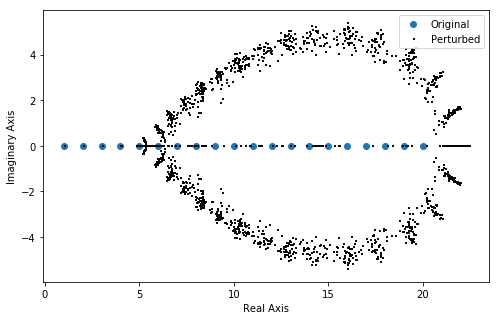

Approximate absolute condition number: 3.805827465666305e-09
Approximate relative condition number: 2626736399.9932466


In [5]:
abs_condition, rel_condition = wilkinson()

**Problem 3**

In [6]:
def e_cond(A):
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals + 1j * imags
    evals = la.eigvals(A)
    evals_h = la.eigvals(A + H)
    abs_cn = la.norm(evals - evals_h, 2) / la.norm(H, 2)
    rel_cn = abs_cn * la.norm(A, 2) / la.norm(evals, 2)
    
    return abs_cn, rel_cn

In [7]:
# Check

A = np.random.random((10, 10))
absC, relC = e_cond(A)
print("Absolute condition number: " + str(absC))
print("Relative condition number: " + str(relC))

Absolute condition number: 2808424690.4797726
Relative condition number: 2752691435.338846


**Problem 4**

In [8]:
def plot_e_cond(x0, x1, y0, y1, res):
    
    x = np.linspace(x0,x1,res)
    y = np.linspace(y0,y1,res)
    Z = np.empty((res,res))
    for i in range(res):
        for j in range(res):
            A=np.array([[1,x[i]],[y[j],1]])
            Z[i,j] = e_cond(A)[1]
    X,Y = np.meshgrid(x,y)
    plt.pcolormesh(X,Y,Z,cmap='gray_r')
    plt.colorbar()
    plt.show()

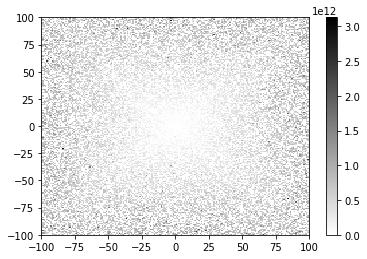

In [9]:
plot_e_cond(-100, 100, -100, 100, 200)

**Problem 5**

In [10]:
def poly(n):
    
    xk, yk = np.load('stability_data.npy').T
    A = np.vander(xk, n + 1)
    cinv = la.inv(A.T @ A) @ A.T @ yk
    Q,R = la.qr(A,mode='economic')
    cqr = la.solve_triangular(R, Q.T @ yk)
    domain = np.linspace(np.amin(xk), np.amax(xk), 50)
    plt.plot(xk, yk, '.k')
    plt.plot(domain, np.polyval(cinv, domain),
             label='Normal Equations', linewidth=2)
    plt.plot(domain, np.polyval(cqr, domain), 
             label='QR Solver', linewidth=2)
    plt.legend(loc='upper left')
    plt.title("n={}".format(n))
    plt.show()
    for_err1 = la.norm(A @ cinv - yk, ord=2)
    for_err2 = la.norm(A @ cqr - yk, ord=2)
    return for_err1, for_err2

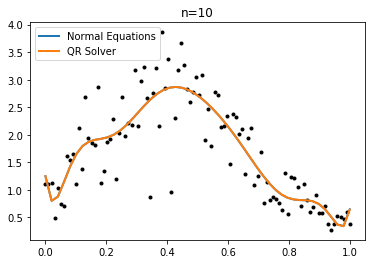

(4.644331669640257, 4.644309587536279)

In [11]:
poly(10)

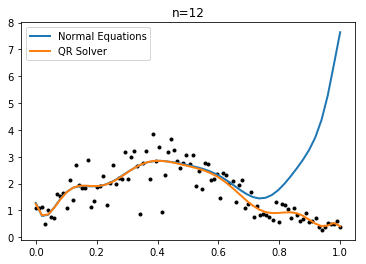

(17.478365893175948, 4.593408026769966)

In [12]:
poly(12)

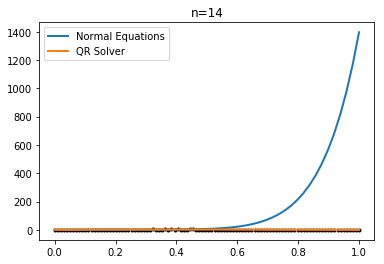

(3437.523110023054, 4.568370943925117)

In [13]:
poly(14)

**Problem 6**

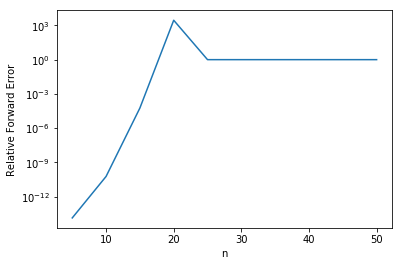

In [14]:
x = sy.Symbol('x')
error = []

for n in np.arange(5, 51, 5):
    n = int(n)
    integ =  float(sy.integrate(((x ** n) * sy.exp(x - 1)), (x, 0, 1)))
    sums = float(((-1) ** n) * sy.subfactorial(n) + ((-1) ** (n+1)) * \
                 (sy.factorial(n) / math.e))
    error.append(abs(sums - integ) / abs(integ))
plt.plot(np.arange(5, 51, 5), error)
plt.xlabel('n')
plt.yscale('log')
plt.ylabel('Relative Forward Error')
plt.show()

For large values of $n$, this approximation method is stable for computing $I(n)$, which might happen due to instability of large factorials